Executed notebook outputs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from src.data.train_dataset_EDA import load_train_with_features, load_test_with_features
from src.features.tfidf import fit_tfidf_on_clean_text_column
from src.data.dataset import Label_map  


In [2]:
train_df = load_train_with_features()
test_df = load_test_with_features()

print("Train df:", train_df.shape)
print("Test df:", test_df.shape)

train_df.head()

Train df: (16000, 6)
Test df: (2000, 6)


,text,label,char_len,word_len,clean_text,clean_word_len
0,i didnt feel humiliated,0,23,4,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,0,108,21,i can go from feeling so hopeless to so damned...,21
2,im grabbing a minute to post i feel greedy wrong,3,48,10,im grabbing a minute to post i feel greedy wrong,10
3,i am ever feeling nostalgic about the fireplac...,2,92,18,i am ever feeling nostalgic about the fireplac...,18
4,i am feeling grouchy,3,20,4,i am feeling grouchy,4


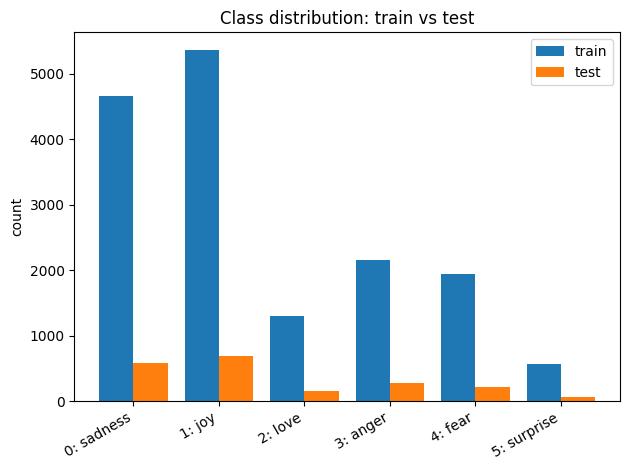

In [3]:
train_counts = train_df["label"].value_counts().sort_index()
test_counts = test_df["label"].value_counts().sort_index()

labels = [f"{i}: {Label_map[i]}" for i in train_counts.index]

x = np.arange(len(labels))
width = 0.4

plt.figure()
plt.bar(x - width/2, train_counts.values, width, label="train")
plt.bar(x + width/2, test_counts.values, width, label="test")
plt.xticks(x, labels, rotation=30, ha="right")
plt.title("Class distribution: train vs test")
plt.ylabel("count")
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
vectorizer, X_train, y_train = fit_tfidf_on_clean_text_column()

X_test_text = test_df["clean_text"]
y_test = test_df["label"].values
X_test = vectorizer.transform(X_test_text)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


X_train: (16000, 20000)
X_test: (2000, 20000)


In [5]:
model = LogisticRegression(
    max_iter=2000,
    solver="lbfgs",
    class_weight="balanced",
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [6]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).T
report_df


,precision,recall,f1-score,support
0,0.932358,0.877797,0.904255,581.0000
1,0.922256,0.870504,0.895633,695.0000
2,0.688995,0.905660,0.782609,159.0000
3,0.857143,0.872727,0.864865,275.0000
4,0.857143,0.830357,0.843537,224.0000
5,0.593407,0.818182,0.687898,66.0000
accuracy,0.869500,0.869500,0.869500,0.8695
macro avg,0.808550,0.862538,0.829800,2000.0000
weighted avg,0.879549,0.869500,0.872232,2000.0000


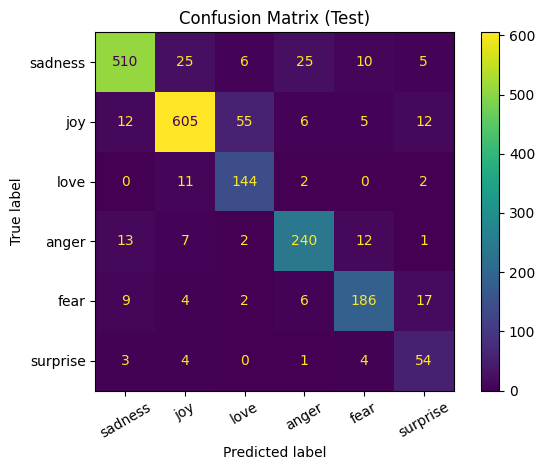

In [7]:
cm = confusion_matrix(y_test, y_pred, labels=sorted(Label_map.keys()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[Label_map[i] for i in sorted(Label_map.keys())])

fig, ax = plt.subplots()
disp.plot(ax=ax, xticks_rotation=30)
plt.title("Confusion Matrix (Test)")
plt.tight_layout()
plt.show()


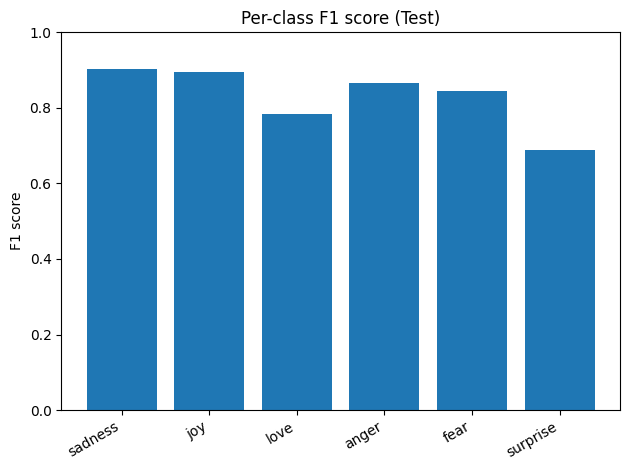

In [8]:
f1_per_class = [report_dict[str(i)]["f1-score"] for i in sorted(Label_map.keys())]
class_names = [Label_map[i] for i in sorted(Label_map.keys())]

x = np.arange(len(class_names))

plt.figure()
plt.bar(x, f1_per_class)
plt.xticks(x, class_names, rotation=30, ha="right")
plt.ylim(0, 1.0)
plt.title("Per-class F1 score (Test)")
plt.ylabel("F1 score")
plt.tight_layout()
plt.show()
